# Edit dataset

In [717]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
import random
import torch

dataset=Planetoid(root=r"./Cora777777777",name="Cora")

Cora is a homogeneous graph, with only one type of node ( paper ) and one type of edge

In [718]:
print(" The number of classes contained in the network data :",dataset.num_classes)
print(" Number of characteristics of network data edge :",dataset.num_edge_features)
print(" Number of network data sides :",dataset.data.edge_index.shape[1]/2) #  Divide 2 yes OOC The organizational form of 
print(" Characteristic number of network data nodes :",dataset.num_node_features)
print(" Number of network data nodes :",dataset.data.x.shape[0])


 The number of classes contained in the network data : 7
 Number of characteristics of network data edge : 0
 Number of network data sides : 5278.0
 Characteristic number of network data nodes : 1433
 Number of network data nodes : 2708


## Create numpy arrays from Data (dataset.data)

In [719]:
# # Graph connectivity in COO format with shape [2, num_edges]
# edge_index = dataset.data.edge_index;

# # Edge feature matrix with shape [num_edges, num_edge_features]
# edge_attr = dataset.data.edge_attr; #None

# # Node feature matrix with shape [num_nodes, num_node_features]
# x = dataset.data.x

# # Graph-level or node-level ground-truth labels with arbitrary shape.
# y = dataset.data.y

# # Node position matrix with shape [num_nodes, num_dimensions]
# pos = dataset.data.pos #None

# # Rest
# batch = dataset.data.batch #None
# keys = dataset.data.keys
# edge_weight = dataset.data.edge_weight #None
# node_stores = dataset.data.node_stores #?
# edge_stores = dataset.data.edge_stores #?

In [720]:
ml = np.array([9,9,9,8,8,8,8,8,7,7,7,6,6,6,5,5,5,4,4,4,4,4,4,4,3,3,3,2,2,1,0,0,0])
ok = np.sort(ml)
edges_test = np.stack([ok, ml])
edges_test = torch.tensor(edges_test)

wf = np.where(ml == 8)


# Edit arrays and save them to a new Data object

classData(x: Optional[Tensor] = None, edge_index: Optional[Tensor] = None, edge_attr: Optional[Tensor] = None, y: Optional[Tensor] = None, pos: Optional[Tensor] = None, **kwargs)

**Delete the edges of most connected node**

In [721]:
def deleteMostConnectedEdge(edge_index):
    """
    Remove the edges of most connected node

    :input: edge index, dtype=tensor
    :return: modified edge index, dtype=tensor
    """
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy();
   
    left = edge_index[0]
    right = edge_index[1]

    # Find the most connected
    count_edge_0 = np.bincount(edge_index[0])
    max_edge_0 = np.max(count_edge_0)

    # Get the index of elements; index == edge
    index_max_0 = np.where(count_edge_0 == max_edge_0)
    index_max_0 = index_max_0[0][0]

    # indxs to delete
    to_delete_left = np.where(left == index_max_0)

    #left
    new_edges_left = np.delete(left, to_delete_left)
    new_edges_right = np.delete(right, to_delete_left)
    
    #right
    to_delete_right = np.where(new_edges_right == index_max_0)
    new_edges_right = np.delete(new_edges_right, to_delete_right)
    new_edges_left = np.delete(new_edges_left, to_delete_right)
    print("Output:")
    print(new_edges_left)
    print(new_edges_right)
    return torch.tensor(np.stack([new_edges_left, new_edges_right]))
    
#edge_index_delete_most_connected = deleteMostConnectedEdge(dataset.data.edge_index)
edge_index_delete_most_connected = deleteMostConnectedEdge(dataset.data.edge_index)
edge_index_delete_most_connected    

Output:
[   0    0    0 ... 2707 2707 2707]
[ 633 1862 2582 ...  598 1473 2706]


tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

**Delete random edge**

In [722]:
def deleteRandomEdge(edge_index, n):
    """
    Delete random edges.
    :input: edge_index, dtype=tensor
            n, number of edges, dtype=int
    :output: modified edge index, dtype=tensor
    """
    if n > len(edge_index[0]):
        print("The value of n is bigger than the number of edges")
        return

    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy();
    left = edge_index[0]
    right = edge_index[1]
    count_edge_0 = np.bincount(edge_index[0])

    # Generate n random indexes
    randomlist = random.sample(range(0, len(left)), n)
        
    new_edges_left = np.delete(left, randomlist)
    new_edges_right = np.delete(right, randomlist)

    print("Output:")
    print(new_edges_left)
    print(new_edges_right)

    return torch.tensor(np.stack([new_edges_left, new_edges_right]))

edge_index_delete_random = deleteRandomEdge(dataset.data.edge_index, 1)
#edge_index_delete_random = deleteRandomEdge(edges_test, 30)

Output:
[   0    0    0 ... 2707 2707 2707]
[ 633 1862 2582 ...  598 1473 2706]


**Add random edge**

In [723]:
def addRandomEdge(edge_index, n):
    """
    Add random edges to existing nodes
    :input: edge_index, dtype=tensor
            n, number of edges, dtype=int
    :output: modified edge index, dtype=tensor

    """
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy()
    left = edge_index[0]
    right = edge_index[1]

    count_edge_0 = np.bincount(edge_index[0])
    print(len(count_edge_0))
    count_edge_1 = np.bincount(edge_index[1])

    # Generate n random edges
    randomlist1 = np.random.randint(0, len(count_edge_0), size=(n, ))
    print(randomlist1)
    for re in range(len(randomlist1)):
        left = np.append(left, randomlist1[re])

    randomlist2 = np.random.randint(0, len(count_edge_0), size=(n, ))
    for re in range(len(randomlist2)):
        right = np.append(right, randomlist2[re])

    return torch.tensor(np.stack([left, right]))

edge_index_add_random = addRandomEdge(dataset.data.edge_index, 60)
#edge_index_add_random = addRandomEdge(edges_test, 10)
edge_index_add_random


10
[5 2 7 2 6 7 1 3 8 8]


tensor([[0, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7,
         7, 8, 8, 8, 8, 8, 9, 9, 9, 5, 2, 7, 2, 6, 7, 1, 3, 8, 8],
        [9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,
         3, 3, 3, 2, 2, 1, 0, 0, 0, 2, 9, 7, 2, 7, 2, 2, 7, 0, 7]],
       dtype=torch.int32)

**Create new Data object**

In [724]:
from torch_geometric.data import Data
dataset_new = Data(x=dataset.data.x, y=dataset.data.y, edge_index=edge_index_delete_most_connected)

In [725]:
dataset = Data(x=dataset.data.x, y=dataset.data.y, edge_index=dataset.data.edge_index)

## Plot the graph using networkx

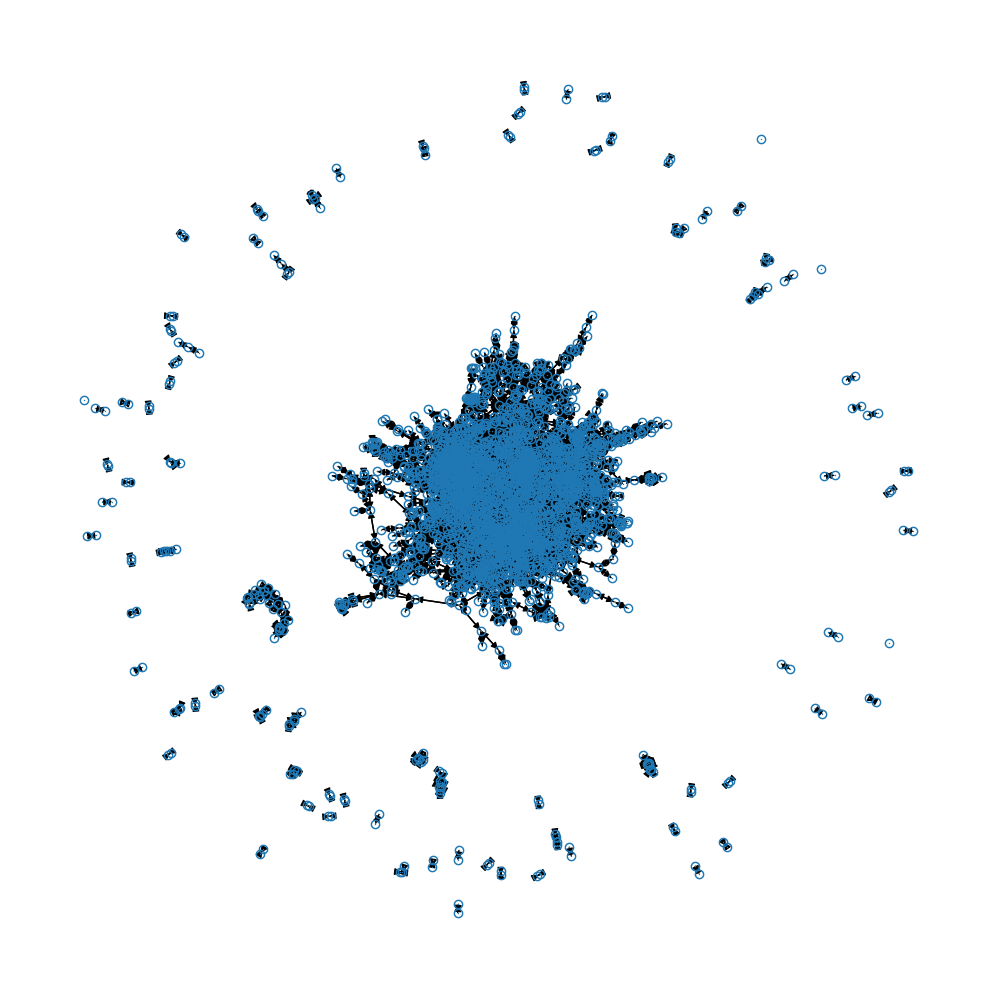

In [726]:
from torch_geometric.utils.convert import to_networkx
dataset_new.to_dict()
%matplotlib widget
vis = to_networkx(dataset_new)
plt.figure(1,figsize=(10,10)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=1,linewidths=6)
plt.show()



**Check if the graph has self loops**

In [727]:
def getPairsNum(edge_index):
    '''
    Check if the graph has self loops. 
    
    :edge_index: edge indexes
    :return: the number of pairs
    '''
    pairs = 0;
    for i in range(len(edge_index[0])):
        if edge_index[0][i] == edge_index[1][i]:
            pairs += 1
            print(i)
    
    return pairs

pairs = getPairsNum(edge_index_delete_random)